In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6
import sqlite3
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

In [2]:
sns.set(style='whitegrid',color_codes=True)

In [3]:
train=pd.read_csv('D:\Train_UWu5bXk.csv')
test=pd.read_csv('D:\Test_u94Q5KV.csv')

In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
import matplotlib.pyplot as plt

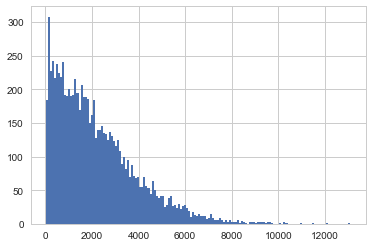

In [10]:
graph1=plt.hist(train['Item_Outlet_Sales'],bins=150)

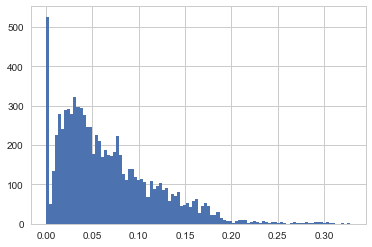

In [11]:
graph2=plt.hist(train['Item_Visibility'],bins=100)

In [12]:
categorical=train.dtypes.loc[train.dtypes=='object'].index

In [13]:
print(categorical)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [14]:
train[categorical].apply(lambda x:len(x.unique()))

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [15]:
category=categorical[1:]
print(category)

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [16]:
train['Item_Fat_Content'].value_counts()/train.shape[0]

Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64

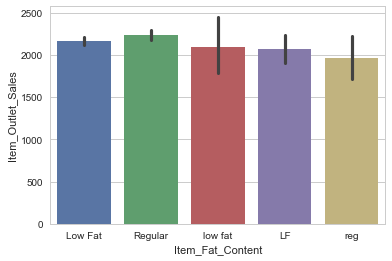

In [17]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)

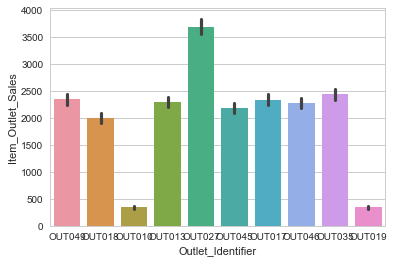

In [18]:
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)

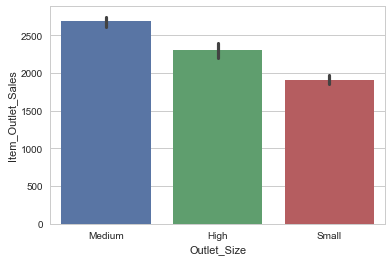

In [19]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

In [20]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
test['Item_Fat_Content'].value_counts()/train.shape[0]

Low Fat    0.398451
Regular    0.227033
LF         0.024170
reg        0.009152
low fat    0.007744
Name: Item_Fat_Content, dtype: float64

In [22]:
c=0
for i in range(train.shape[0]):
    if train.iloc[i]['Item_Fat_Content']=='LF':
        train.set_value(i,'Item_Fat_Content','Low Fat')
    if train.iloc[i]['Item_Fat_Content']=='low fat':
        train.set_value(i,'Item_Fat_Content','Low Fat')
    if train.iloc[i]['Item_Fat_Content']=='reg':
        train.set_value(i,'Item_Fat_Content','Regular')


C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [23]:
for i in range(test.shape[0]):
    if test.iloc[i]['Item_Fat_Content']=='LF':
        test.set_value(i,'Item_Fat_Content','Low Fat')
    if test.iloc[i]['Item_Fat_Content']=='low fat':
        test.set_value(i,'Item_Fat_Content','Low Fat')
    if test.iloc[i]['Item_Fat_Content']=='reg':
        test.set_value(i,'Item_Fat_Content','Regular')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [24]:
train['Item_Fat_Content'].value_counts()/train.shape[0]

Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64

In [25]:
test['Item_Fat_Content'].value_counts()/train.shape[0]

Low Fat    0.430365
Regular    0.236184
Name: Item_Fat_Content, dtype: float64

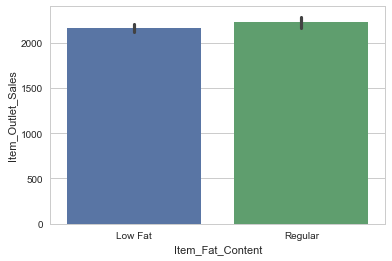

In [26]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)

In [27]:
print('HI')

HI


In [28]:
train['Item_Type'].value_counts()/train.shape[0]

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

In [29]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [30]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [31]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [32]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

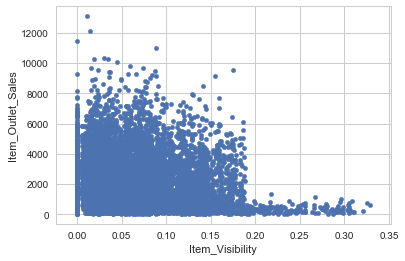

In [33]:
train.plot('Item_Visibility','Item_Outlet_Sales',kind='scatter')

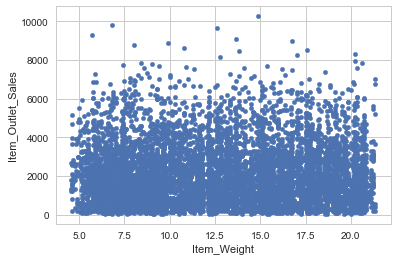

In [34]:
train.plot('Item_Weight','Item_Outlet_Sales',kind='scatter')

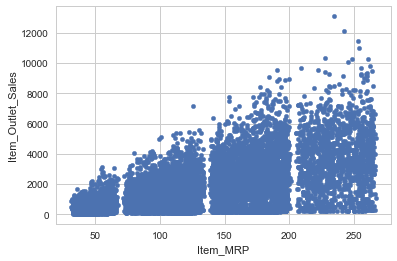

In [35]:
train.plot('Item_MRP','Item_Outlet_Sales',kind='scatter')

# Target variable vs. Categorical var. through violin plotting

In [45]:
rcParams['figure.figsize'] = 30, 8

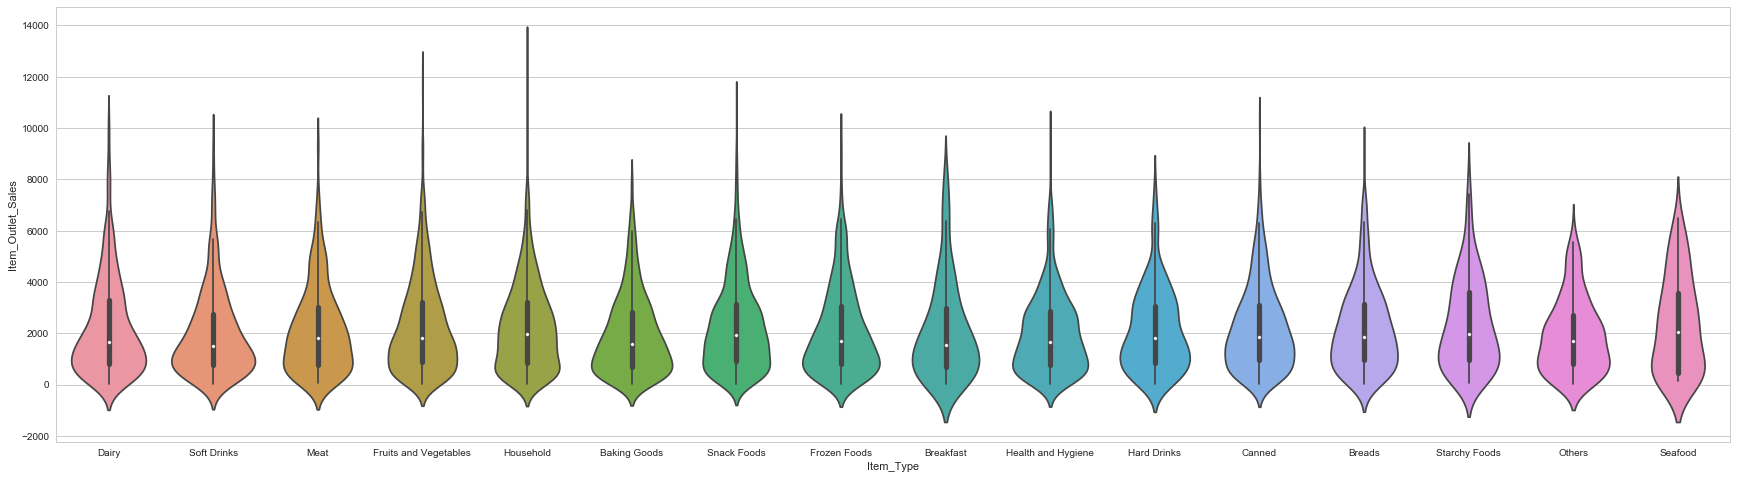

In [46]:
sns.set_style('whitegrid')
#sales=sns.load_dataset('train')
ax=sns.violinplot(x='Item_Type',y='Item_Outlet_Sales',data=train)

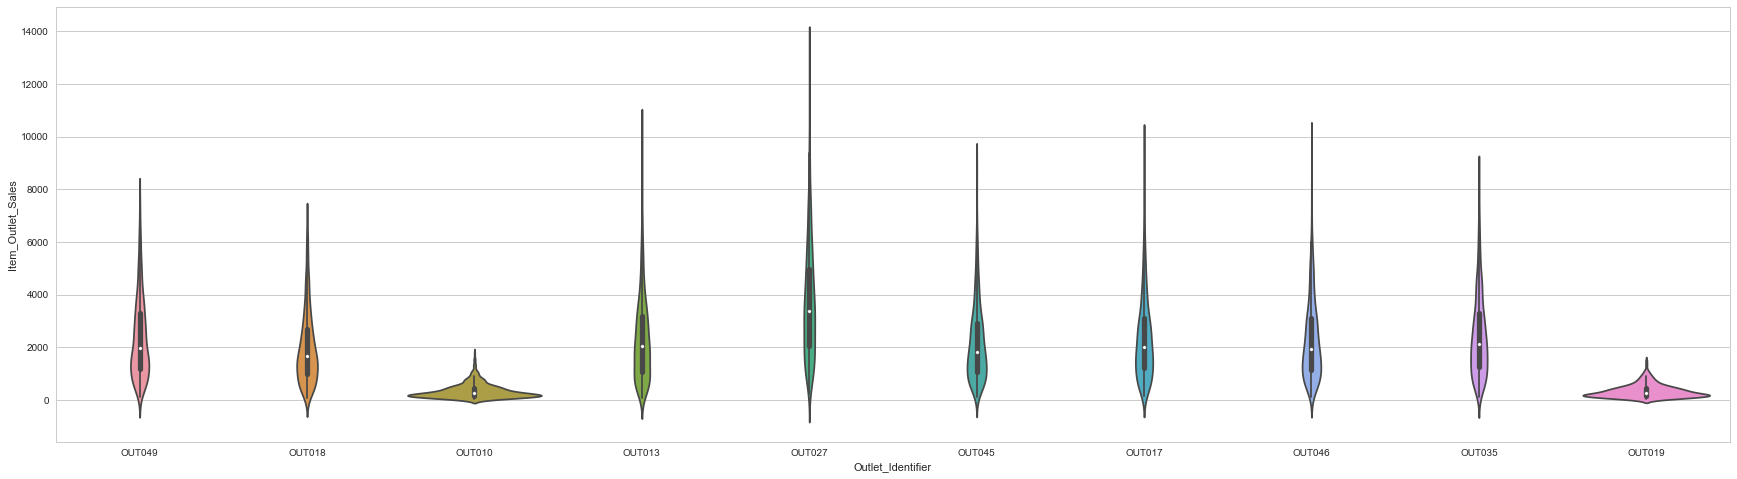

In [47]:
ax=sns.violinplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)

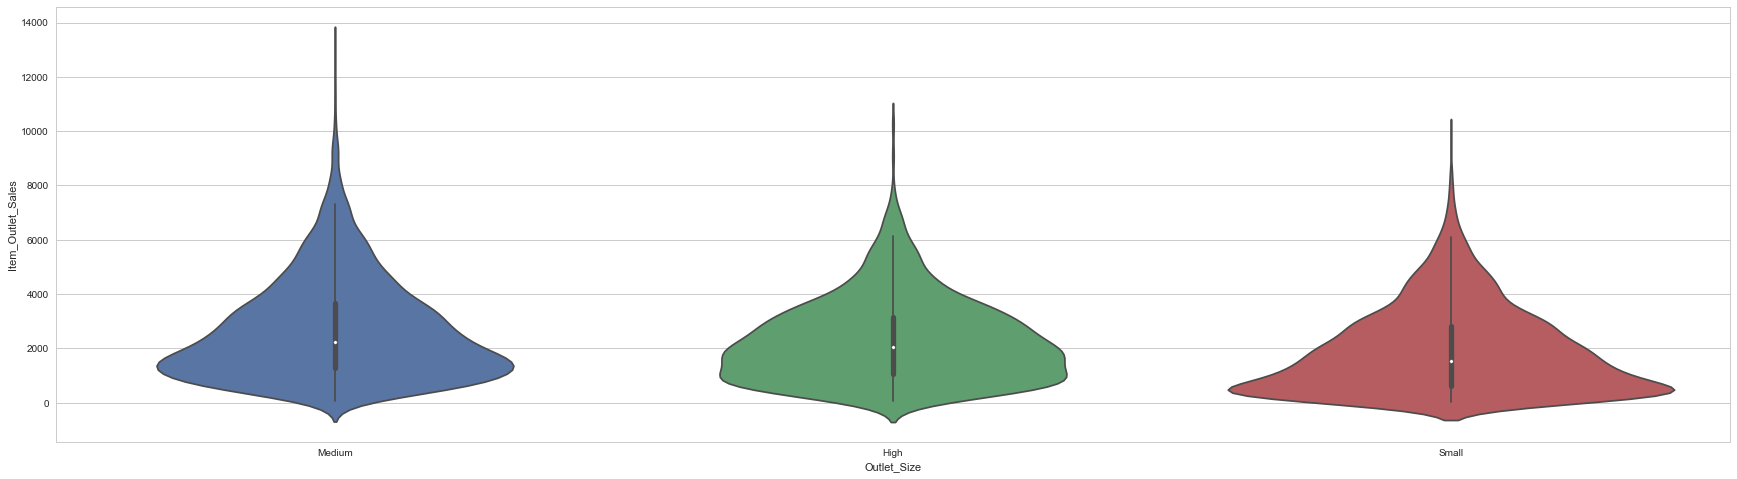

In [48]:
ax=sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

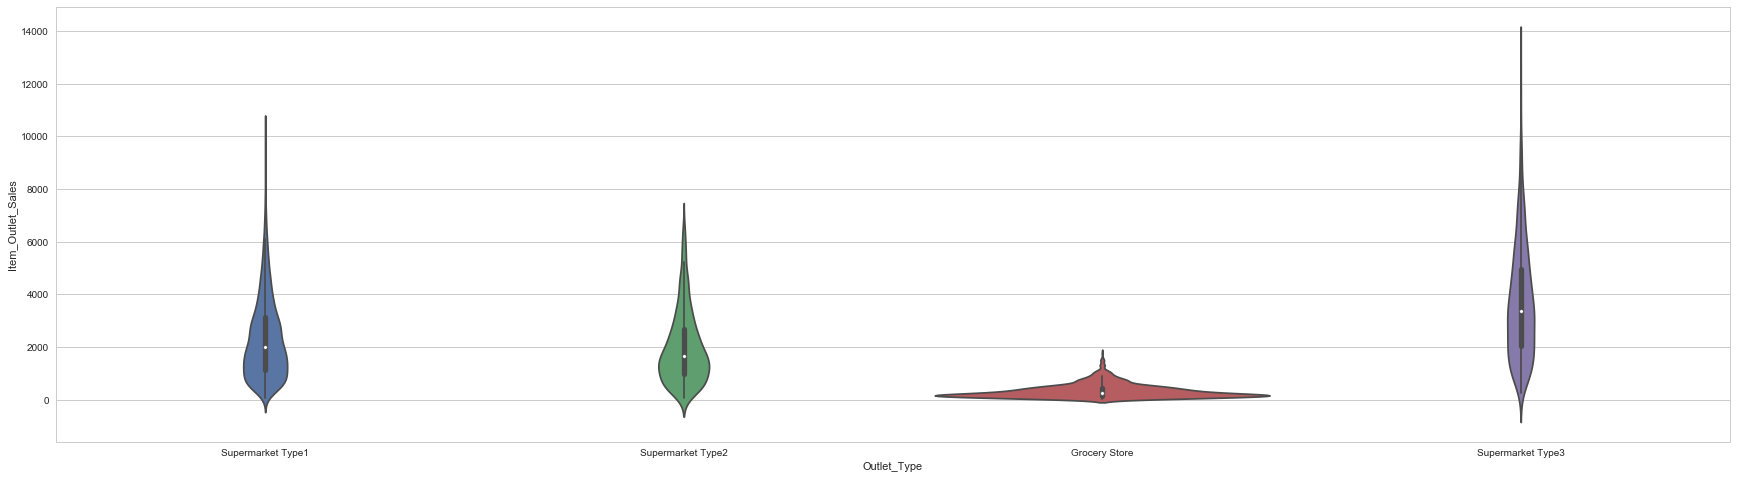

In [49]:
ax=sns.violinplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)

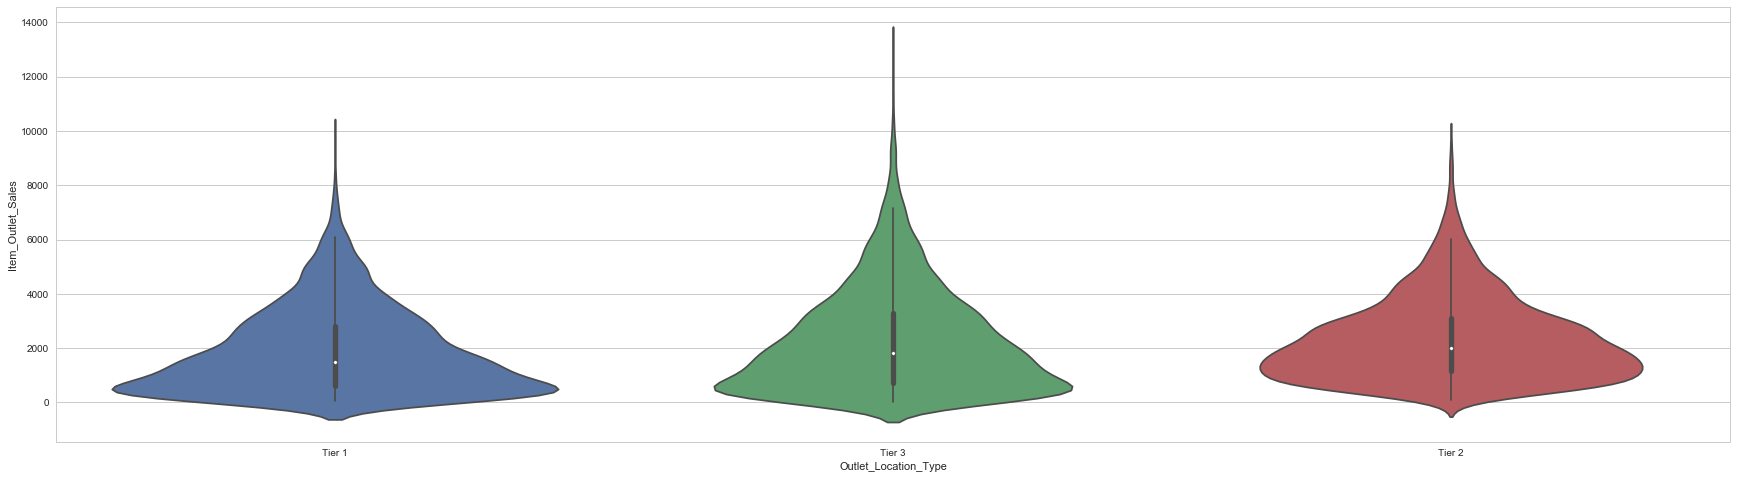

In [50]:
ax=sns.violinplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)

In [51]:
impute_var=['Item_Weight']

In [52]:
for v in impute_var:
    train[v].fillna((train[v].mean()),inplace=True)
    test[v].fillna((test[v].mean()),inplace=True)

In [53]:
test.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [54]:
train[v].mean()

12.857645184136409

In [55]:
test[v].mean()

12.695633368756402

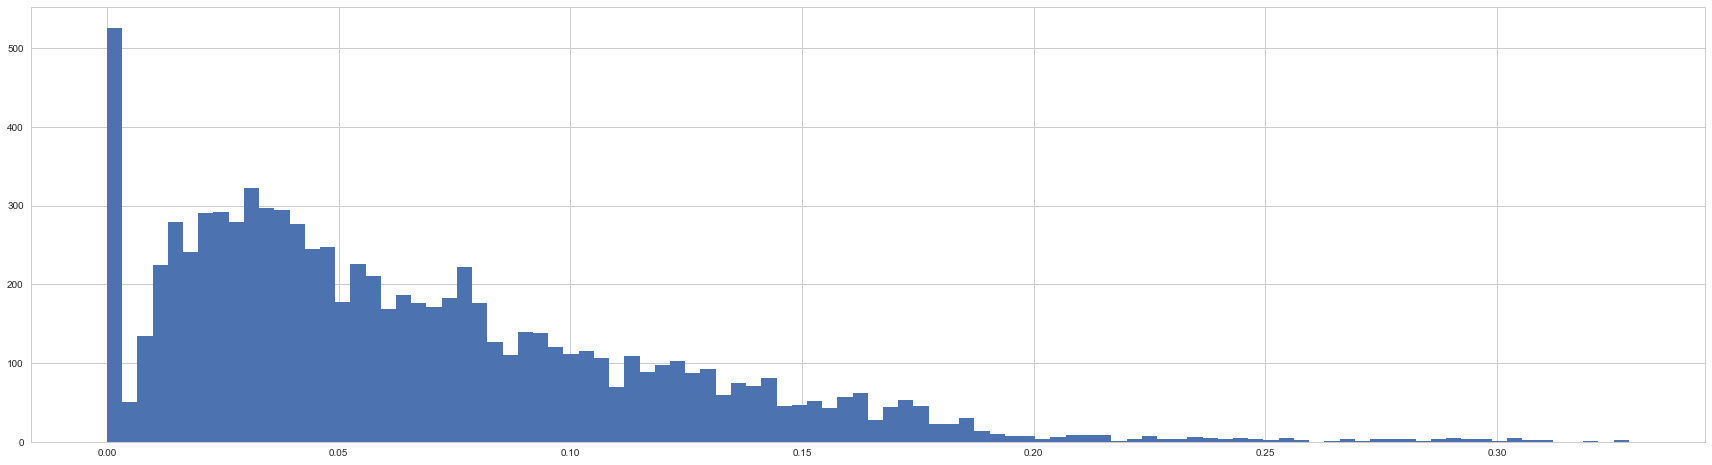

In [56]:
graph2=plt.hist(train['Item_Visibility'],bins=100)

In [57]:
for i in range(train.shape[0]):
    if train.iloc[i]['Item_Visibility']==0.000000:
        train.set_value(i,'Item_Visibility',train['Item_Visibility'].mean())


C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


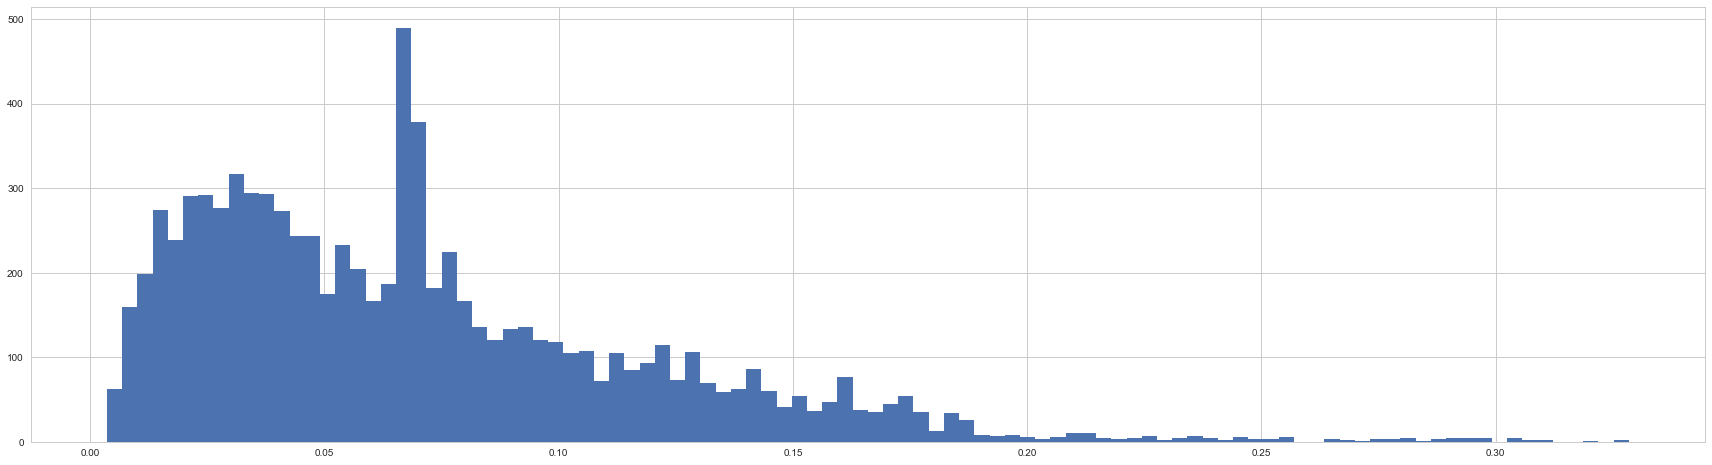

In [58]:
graph2=plt.hist(train['Item_Visibility'],bins=100)

In [59]:
for i in range(test.shape[0]):
    if test.iloc[i]['Item_Visibility']==0.000000:
        test.set_value(i,'Item_Visibility',test['Item_Visibility'].mean())

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [61]:
train['price_per_unit_wt']=train['Item_MRP']/train['Item_Weight']

In [62]:
test['price_per_unit_wt']=test['Item_MRP']/test['Item_Weight']

In [63]:
train['Outlet_Years']=2018-train['Outlet_Establishment_Year']
test['Outlet_Years']=2018-test['Outlet_Establishment_Year']

In [64]:
for i in range(train.shape[0]):
    c=0
    item=train.iloc[i]['Item_Type']
    for j in perishable:
        if item==j:
            train.set_value(i,'Item_Type_New','perishable')
            c=1
            break
    for j in non_perishable:
        if item==j:
            train.set_value(i,'Item_Type_New','non_perishable')
            c=1
            break
    if c==0:
        train.set_value(i,'Item_Type_New','not sure')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [66]:
for i in range(test.shape[0]):
    c=0
    item=test.iloc[i]['Item_Type']
    for j in perishable:
        if item==j:
            test.set_value(i,'Item_Type_New','perishable')
            c=1
            break
    for j in non_perishable:
        if item==j:
            test.set_value(i,'Item_Type_New','non_perishable')
            c=1
            break
    if c==0:
        test.set_value(i,'Item_Type_New','not sure')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [67]:
for i in range(train.shape[0]):
    item=train.iloc[i]['Item_Identifier'][0:2]
    if item=='NC':
        train.set_value(i,'Item_Fat_Content','non-edible')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [69]:
for i in range(test.shape[0]):
    item=test.iloc[i]['Item_Identifier'][0:2]
    if item=='NC':
        test.set_value(i,'Item_Fat_Content','non-edible')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [70]:
for i in range(train.shape[0]):
    item=train.iloc[i]['Item_MRP']
    if item < 69:
        train.set_value(i,'Item_MRP_cluster','1st')
    elif item>=69 and item<136:
        train.set_value(i,'Item_MRP_cluster','2nd')
    elif item>=136 and item<203:
        train.set_value(i,'Item_MRP_cluster','3rd')
    else:
        train.set_value(i,'Item_MRP_cluster','4th')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [72]:
for i in range(test.shape[0]):
    item=test.iloc[i]['Item_MRP']
    if item < 69:
        test.set_value(i,'Item_MRP_cluster','1st')
    elif item>=69 and item<136:
        test.set_value(i,'Item_MRP_cluster','2nd')
    elif item>=136 and item<203:
        test.set_value(i,'Item_MRP_cluster','3rd')
    else:
        test.set_value(i,'Item_MRP_cluster','4th')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [85]:
for i in range(train.shape[0]):
    if pd.isnull(train.loc[i,'Outlet_Size'])==True:
        train.set_value(i,'Outlet_Size','Small')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
for i in range(test.shape[0]):
    if pd.isnull(test.loc[i,'Outlet_Size'])==True:
        test.set_value(i,'Outlet_Size','Small')

C:\Users\Prakhar Kushwaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


# making a copy of dataframe and using it further

In [106]:
sample3=train.copy()

In [101]:
print(categorical)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [107]:
sample3=pd.get_dummies(sample3,columns=['Item_Fat_Content','Outlet_Identifier','Outlet_Type'])

In [109]:
sample4=test.copy()

In [110]:
sample4=pd.get_dummies(sample4,columns=['Item_Fat_Content','Outlet_Identifier','Outlet_Type'])

In [111]:
sample4.shape

(5681, 29)

In [112]:
test.shape

(5681, 15)

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
number=LabelEncoder()

In [115]:
train['Outlet_Size']=number.fit_transform(train['Outlet_Size'].astype(str))

In [117]:
train['Outlet_Location_Type']=number.fit_transform(train['Outlet_Location_Type'].astype(str))

In [118]:
test['Outlet_Size']=number.fit_transform(test['Outlet_Size'].astype(str))

In [119]:
test['Outlet_Location_Type']=number.fit_transform(test['Outlet_Location_Type'].astype(str))

In [122]:
sample3['Outlet_Size']=number.fit_transform(sample3['Outlet_Size'].astype(str))

In [123]:
sample3['Outlet_Location_Type']=number.fit_transform(sample3['Outlet_Location_Type'].astype(str))

In [124]:
sample4['Outlet_Size']=number.fit_transform(sample4['Outlet_Size'].astype(str))
sample4['Outlet_Location_Type']=number.fit_transform(sample4['Outlet_Location_Type'].astype(str))

In [129]:
sample3['Item_Visibility']=np.log(sample3.Item_Visibility)+1

In [131]:
sample3['price_per_unit_wt']=np.log(sample3.price_per_unit_wt)+1

In [133]:
sample4['Item_Visibility']=np.log(sample4.Item_Visibility)+1

In [134]:
sample4['price_per_unit_wt']=np.log(sample4.price_per_unit_wt)+1

In [135]:
sample3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,price_per_unit_wt,Outlet_Years,Item_Fat_Content_Low Fat,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,-1.911169,140.992782,1997.831867,1.453596,1.112871,2181.288914,3.334459,20.168133,0.459697,...,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117,0.127068,0.654347,0.108882,0.109703
std,4.226124,0.765260,62.275067,8.371760,0.683084,0.812757,1706.499616,0.631525,8.371760,0.498402,...,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804,0.333069,0.475609,0.311509,0.312538
min,4.555000,-4.633875,31.290000,1985.000000,0.000000,0.000000,33.290000,1.522368,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,-2.408665,93.826500,1987.000000,1.000000,0.000000,834.247400,2.927440,14.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,-1.772323,143.012800,1999.000000,2.000000,1.000000,1794.331000,3.400778,19.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.000000,-1.358253,185.643700,2004.000000,2.000000,2.000000,3101.296400,3.758866,31.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,-0.113550,266.888400,2009.000000,2.000000,2.000000,13086.964800,4.927419,33.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
from sklearn import preprocessing

In [153]:
features=sample3.dtypes[(sample3.dtypes=='float64') | (sample3.dtypes=='int64') | (sample3.dtypes=='uint8')].index.values
features=np.delete(features,6)

In [154]:
print(features)

['Item_Weight' 'Item_Visibility' 'Item_MRP' 'Outlet_Establishment_Year'
 'Outlet_Size' 'Outlet_Location_Type' 'price_per_unit_wt' 'Outlet_Years'
 'Item_Fat_Content_Low Fat' 'Item_Fat_Content_Regular'
 'Item_Fat_Content_non-edible' 'Outlet_Identifier_OUT010'
 'Outlet_Identifier_OUT013' 'Outlet_Identifier_OUT017'
 'Outlet_Identifier_OUT018' 'Outlet_Identifier_OUT019'
 'Outlet_Identifier_OUT027' 'Outlet_Identifier_OUT035'
 'Outlet_Identifier_OUT045' 'Outlet_Identifier_OUT046'
 'Outlet_Identifier_OUT049' 'Outlet_Type_Grocery Store'
 'Outlet_Type_Supermarket Type1' 'Outlet_Type_Supermarket Type2'
 'Outlet_Type_Supermarket Type3']


In [155]:
min_max_scaler=preprocessing.MinMaxScaler()
sample3_minmax=min_max_scaler.fit_transform(sample3[features])

In [158]:
sample3_minmax.shape

(8523, 25)

In [159]:
sample4_minmax=min_max_scaler.fit_transform(sample4[features])

In [161]:
sample4_minmax.shape

(5681, 25)

In [164]:
sample4.shape

(5681, 29)

In [165]:
sample3.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Establishment_Year          int64
Outlet_Size                        int64
Outlet_Location_Type               int64
Item_Outlet_Sales                float64
price_per_unit_wt                float64
Outlet_Years                       int64
Item_Type_New                     object
Item_MRP_cluster                  object
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Regular           uint8
Item_Fat_Content_non-edible        uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier_OUT027           uint8
Outlet_Identifier_OUT035           uint8
Outlet_Identifier_OUT045           uint8
Outlet_Identifie

In [167]:
def plot_corr(df,size):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

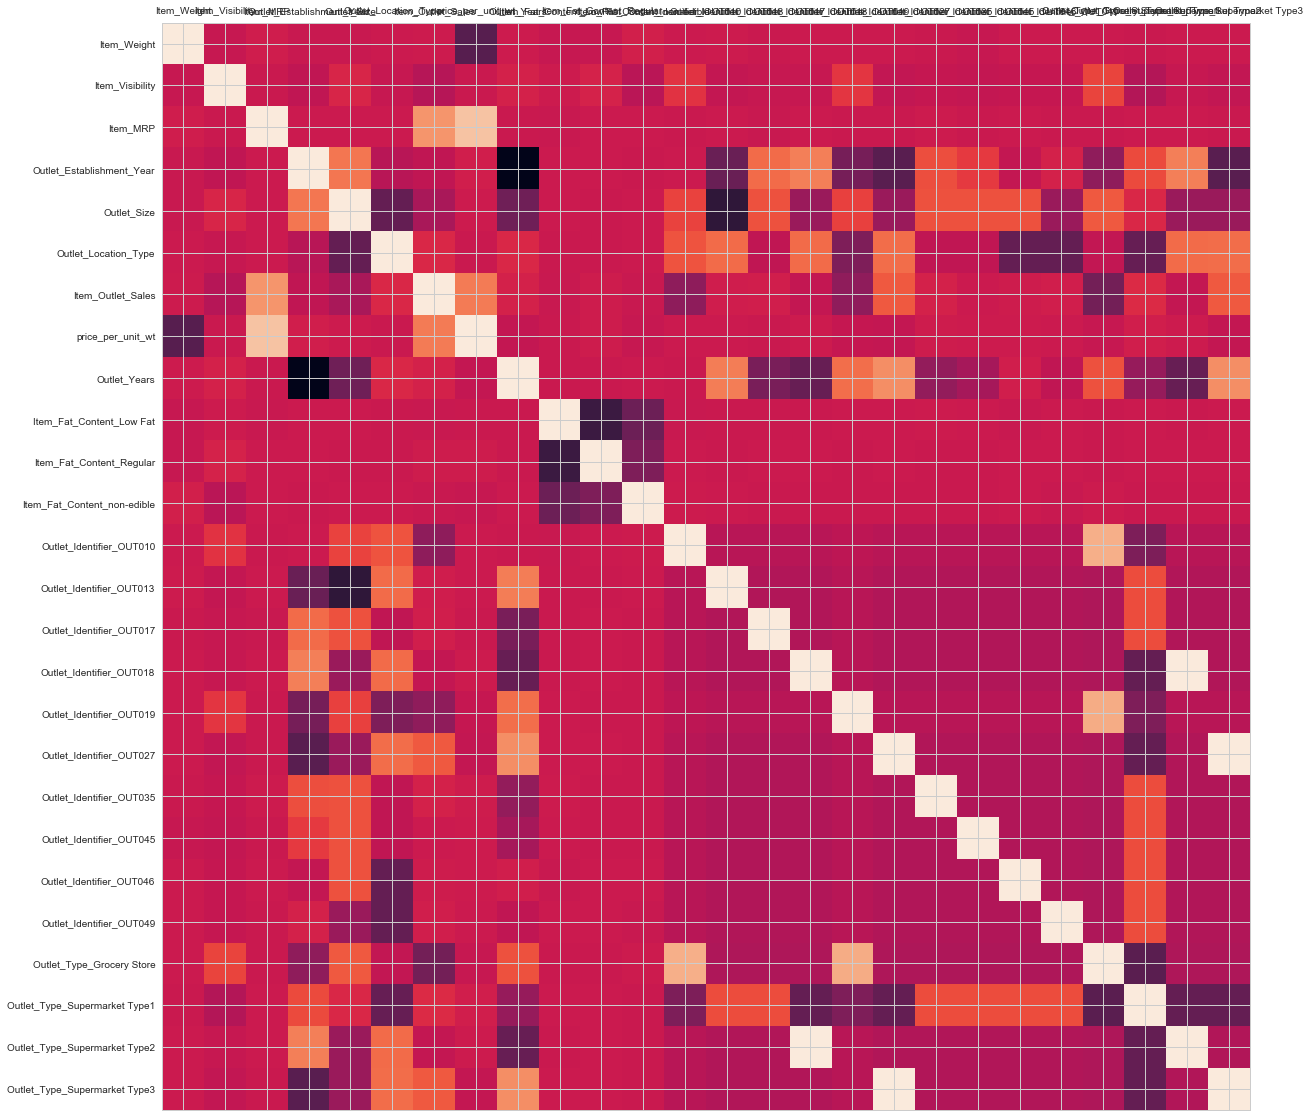

In [169]:
plot_corr(sample3,20)

In [170]:
regressor1 = LinearRegression()
regressor1.fit(sample3_minmax, sample3['Item_Outlet_Sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
y1_prediction = regressor1.predict(sample4_minmax)

In [173]:
print(y1_prediction)

[1867.25 1567.25 1889.25 ... 1819.25 3547.25 1271.25]


In [174]:
y1_prediction.shape

(5681,)